# Data Analysis and Visualization of Workout Trends

## Introduction

In this notebook, we will perform data analysis and visualization to understand workout trends over time. The dataset includes global workout trends, keyword popularity, and geographical interest in workouts. We will explore and visualize the data to gain insights into workout trends and interests.

## 1. Setup

First, we need to import the necessary libraries and load our dataset. Replace the example data with your actual data loading code.

```python
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


### 1. Import Libraries

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data
We will start by loading the datasets into pandas DataFrames.

In [2]:
# Load data
workout_df = pd.read_csv('data/workout.csv')
three_keywords_df = pd.read_csv('data/three_keywords.csv')
workout_geo_df = pd.read_csv('data/workout_geo.csv')
three_keywords_geo_df = pd.read_csv('data/three_keywords_geo.csv')


### 3. Inspect Data
Check the columns, data types, and first few rows of each DataFrame to understand the structure of the data.

In [3]:
# Ensure the 'country' column exists in the dataframes
print('workout_df columns:\n', workout_df.columns, "\n\n")
print('workout_geo_df columns:\n', workout_geo_df.columns, "\n\n")
print('three_keywords_df columns:\n', three_keywords_df.columns, "\n\n")
print('three_keywords_geo_df columns:\n', three_keywords_geo_df.columns, "\n\n")

# Basic Data Exploration
print("First few rows of workout_df:\n", workout_df.head(), "\n\n")
print("First few rows of three_keywords_df:\n", three_keywords_df.head(), "\n\n")
print("First few rows of workout_geo_df:\n", workout_geo_df.head(), "\n\n")
print("First few rows of three_keywords_geo_df:\n", three_keywords_geo_df.head(), "\n\n")

print("Data types in workout_df:\n", workout_df.dtypes, "\n\n")
print("Data types in three_keywords_df:\n", three_keywords_df.dtypes, "\n\n")
print("Data types in workout_geo_df:\n", workout_geo_df.dtypes, "\n\n")
print("Data types in three_keywords_geo_df:\n", three_keywords_geo_df.dtypes, "\n\n")


workout_df columns:
 Index(['month', 'workout_worldwide'], dtype='object') 


workout_geo_df columns:
 Index(['country', 'workout_2018_2023'], dtype='object') 


three_keywords_df columns:
 Index(['month', 'home_workout_worldwide', 'gym_workout_worldwide',
       'home_gym_worldwide'],
      dtype='object') 


three_keywords_geo_df columns:
 Index(['Country', 'home_workout_2018_2023', 'gym_workout_2018_2023',
       'home_gym_2018_2023'],
      dtype='object') 


First few rows of workout_df:
      month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51 


First few rows of three_keywords_df:
      month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0  2018-03                      12                     16                  10
1  2018-04                      12                     18                  10
2  2018-05                      13            

### 4. Check for Missing Values
Identify missing values in each DataFrame and handle them appropriately.

In [4]:
# Check for Missing Values
print("Missing values in workout_df:\n", workout_df.isnull().sum(), "\n\n")
print("Missing values in three_keywords_df:\n", three_keywords_df.isnull().sum(), "\n\n")
print("Missing values in workout_geo_df:\n", workout_geo_df.isnull().sum(), "\n\n")
print("Missing values in three_keywords_geo_df:\n", three_keywords_geo_df.isnull().sum(), "\n\n")

# Handle Missing Values
workout_df.fillna(0, inplace=True)
three_keywords_df.fillna(method='ffill', inplace=True)
workout_geo_df.fillna(0, inplace=True)
three_keywords_geo_df.fillna(0, inplace=True)


Missing values in workout_df:
 month                0
workout_worldwide    0
dtype: int64 


Missing values in three_keywords_df:
 month                     0
home_workout_worldwide    0
gym_workout_worldwide     0
home_gym_worldwide        0
dtype: int64 


Missing values in workout_geo_df:
 country                0
workout_2018_2023    189
dtype: int64 


Missing values in three_keywords_geo_df:
 Country                     0
home_workout_2018_2023    203
gym_workout_2018_2023     203
home_gym_2018_2023        203
dtype: int64 




### 5. Check for Duplicates
Remove any duplicate rows from the DataFrames to ensure data integrity.

In [5]:
# Check for Duplicates
workout_df.drop_duplicates(inplace=True)
three_keywords_df.drop_duplicates(inplace=True)
workout_geo_df.drop_duplicates(inplace=True)
three_keywords_geo_df.drop_duplicates(inplace=True)


### 6. Convert Columns to Appropriate Data Types
Ensure that date columns are in datetime format for time series analysis.

In [6]:
# Convert Columns to Appropriate Data Types
workout_df['month'] = pd.to_datetime(workout_df['month'])
three_keywords_df['month'] = pd.to_datetime(three_keywords_df['month'])


### 7. Descriptive Statistics
Generate descriptive statistics for each DataFrame to understand the data distribution.

In [7]:
# Descriptive Statistics
print("Descriptive statistics for workout_df:\n", workout_df.describe(), "\n\n")
print("Descriptive statistics for three_keywords_df:\n", three_keywords_df.describe(), "\n\n")
print("Descriptive statistics for workout_geo_df:\n", workout_geo_df.describe(), "\n\n")
print("Descriptive statistics for three_keywords_geo_df:\n", three_keywords_geo_df.describe(), "\n\n")

Descriptive statistics for workout_df:
        workout_worldwide
count          61.000000
mean           56.721311
std             9.027977
min            44.000000
25%            50.000000
50%            56.000000
75%            61.000000
max           100.000000 


Descriptive statistics for three_keywords_df:
        home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
count               61.000000              61.000000           61.000000
mean                16.426230              16.180328           13.655738
std                 10.393041               2.539739            5.179721
min                 10.000000              10.000000            9.000000
25%                 12.000000              14.000000           10.000000
50%                 13.000000              16.000000           12.000000
75%                 17.000000              17.000000           15.000000
max                 82.000000              22.000000           34.000000 


Descriptive statistics fo

### 8. Check Correlations
Examine correlations between numerical features in the DataFrames.

In [8]:
# Check Correlations
print("Correlation matrix for workout_df:\n", workout_df.corr(), "\n\n")
print("Correlation matrix for three_keywords_df:\n", three_keywords_df.corr(), "\n\n")


Correlation matrix for workout_df:
                    workout_worldwide
workout_worldwide                1.0 


Correlation matrix for three_keywords_df:
                         home_workout_worldwide  gym_workout_worldwide  \
home_workout_worldwide                1.000000              -0.381180   
gym_workout_worldwide                -0.381180               1.000000   
home_gym_worldwide                    0.858503              -0.447497   

                        home_gym_worldwide  
home_workout_worldwide            0.858503  
gym_workout_worldwide            -0.447497  
home_gym_worldwide                1.000000   




### 9. Data Visualization
Visualize the data to identify trends and patterns.

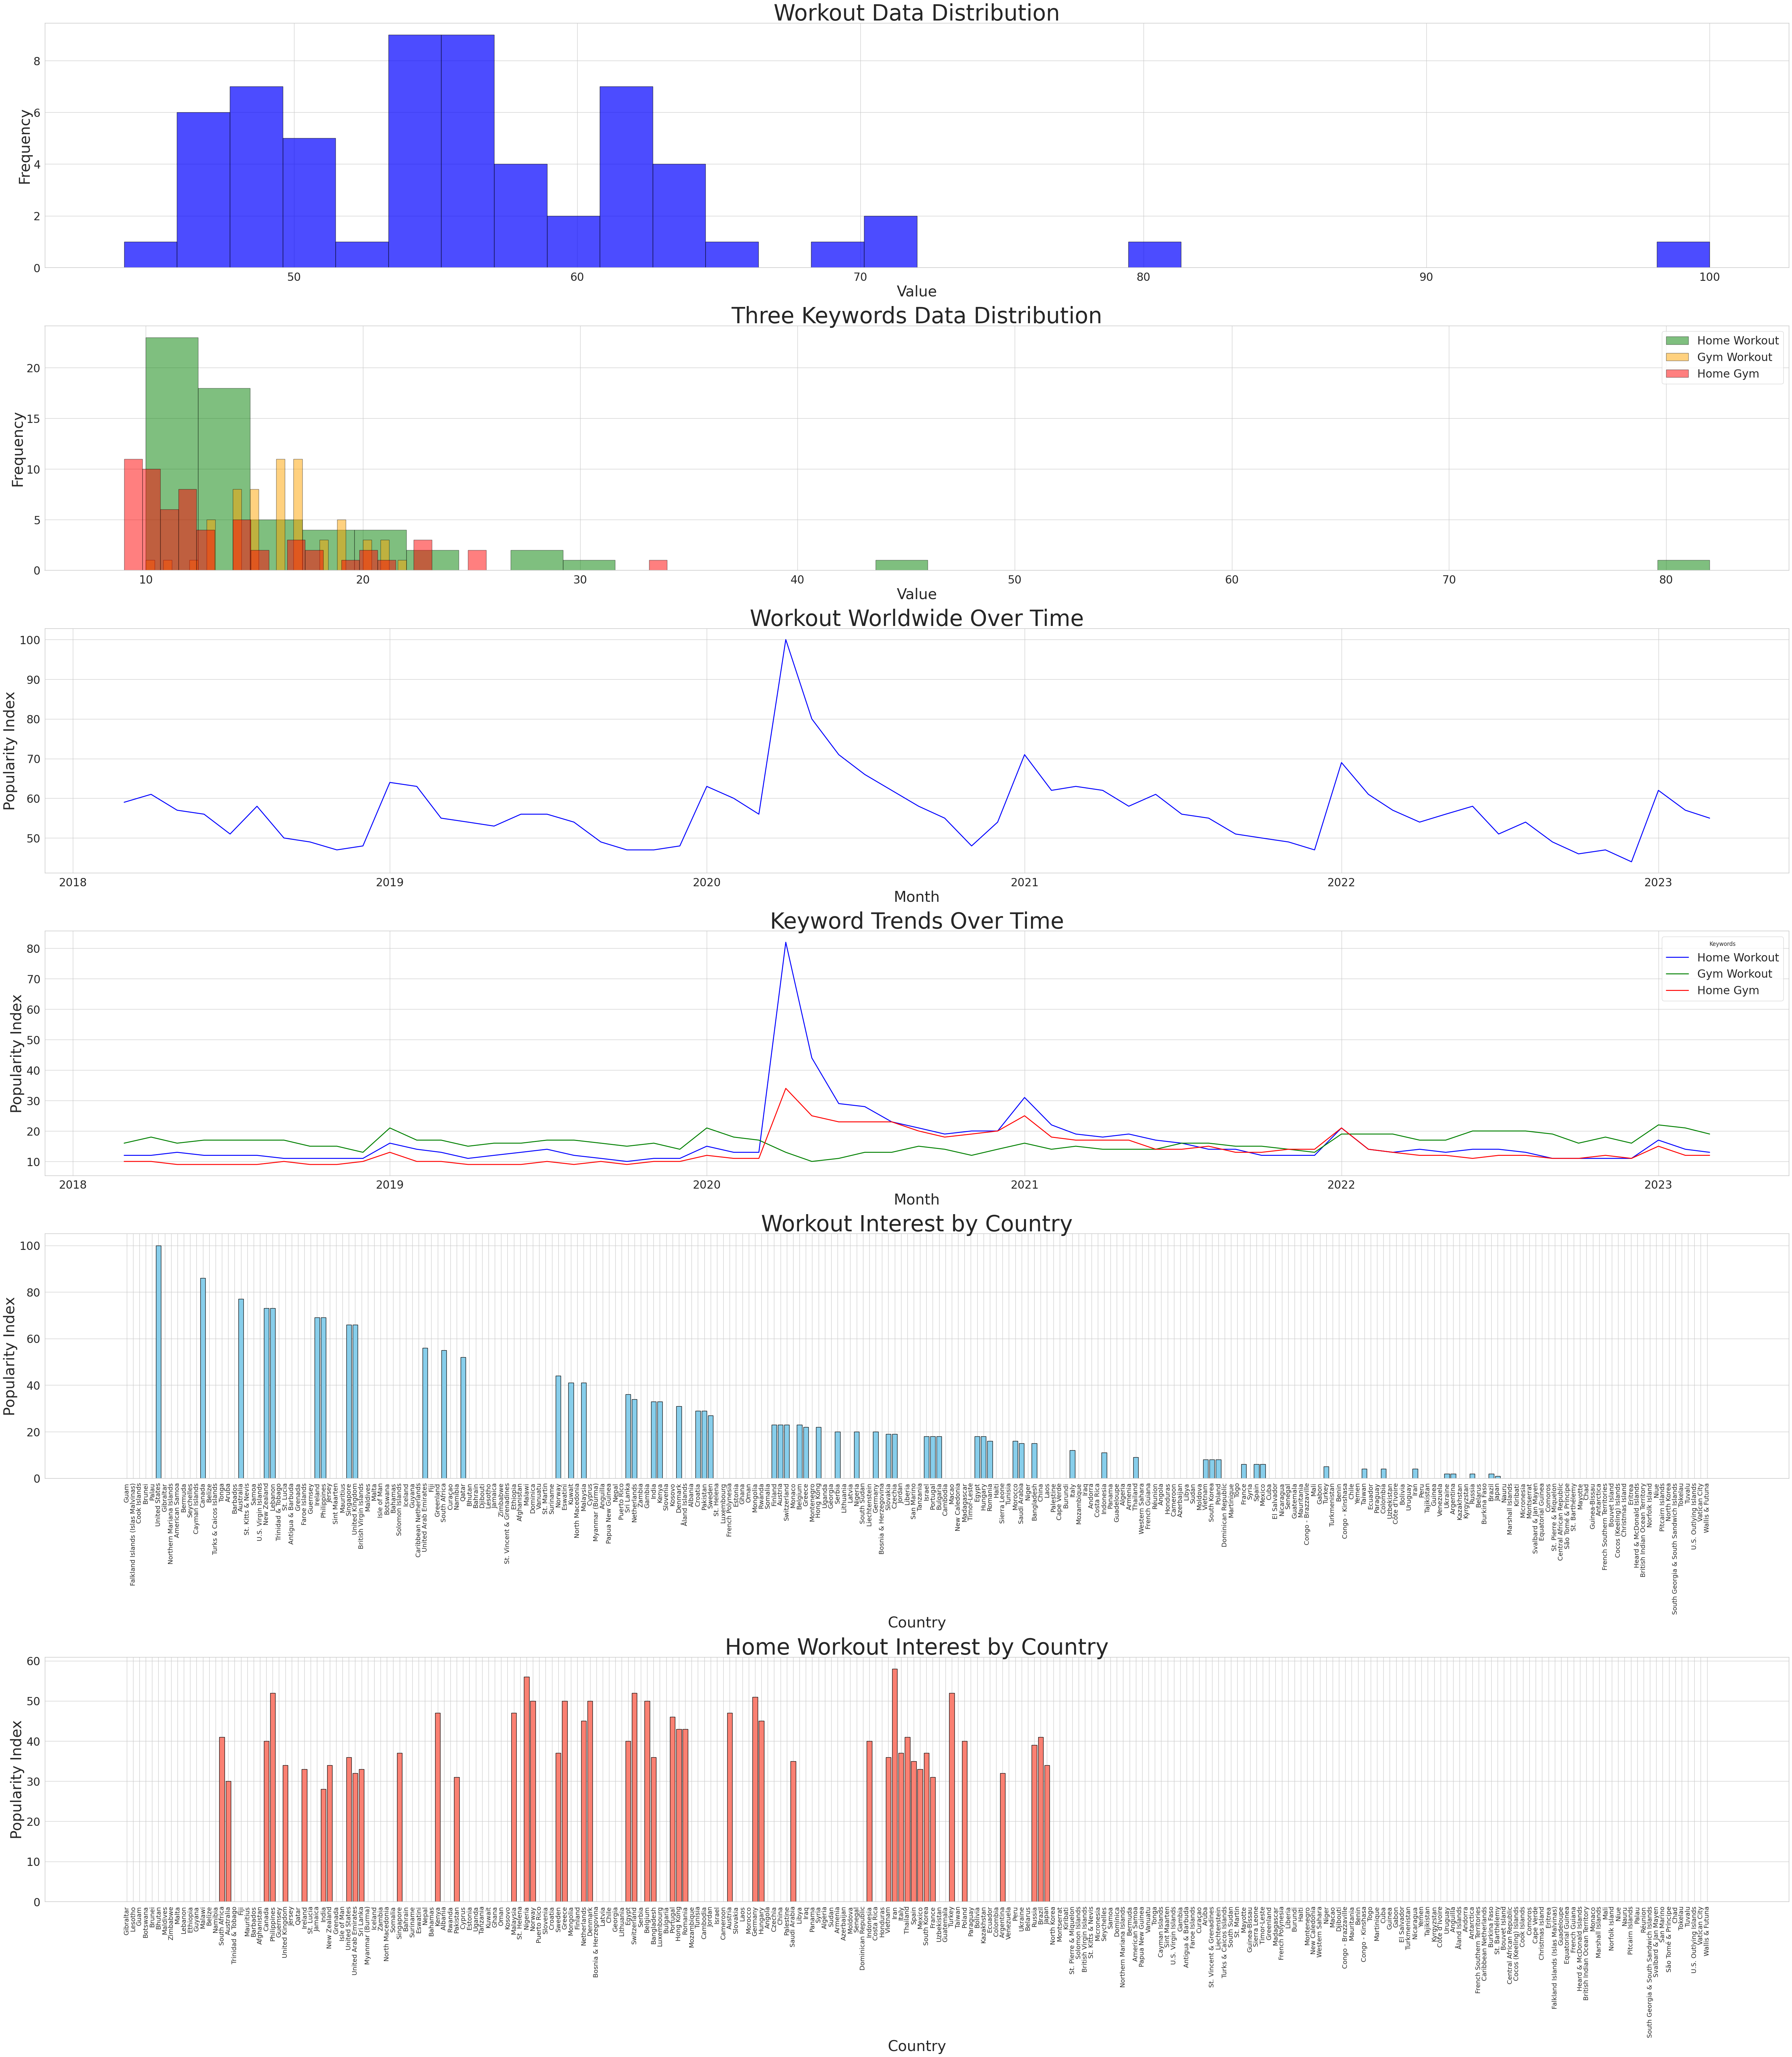

In [9]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a figure with subplots arranged in a single column
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(54, 62), sharex=False, constrained_layout=True)

# 9.1 Distribution of Workout Data
axes[0].hist(workout_df['workout_worldwide'], bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[0].set_title('Workout Data Distribution', fontsize=48)
axes[0].set_xlabel('Value', fontsize=32)
axes[0].set_ylabel('Frequency', fontsize=32)
axes[0].tick_params(axis='x', labelsize=24)  
axes[0].tick_params(axis='y', labelsize=24)  

# 9.2 Distribution of Three Keywords Data
axes[1].hist(three_keywords_df['home_workout_worldwide'], bins=30, color='green', edgecolor='black', alpha=0.5, label='Home Workout')
axes[1].hist(three_keywords_df['gym_workout_worldwide'], bins=30, color='orange', edgecolor='black', alpha=0.5, label='Gym Workout')
axes[1].hist(three_keywords_df['home_gym_worldwide'], bins=30, color='red', edgecolor='black', alpha=0.5, label='Home Gym')
axes[1].set_title('Three Keywords Data Distribution', fontsize=48)
axes[1].set_xlabel('Value', fontsize=32)
axes[1].set_ylabel('Frequency', fontsize=32)
axes[1].legend(fontsize=24)
axes[1].tick_params(axis='x', labelsize=24)
axes[1].tick_params(axis='y', labelsize=24)

# 9.3 Workout Trends Over Time
axes[2].plot(workout_df['month'], workout_df['workout_worldwide'], color='blue', linewidth=2)
axes[2].set_title('Workout Worldwide Over Time', fontsize=48)
axes[2].set_xlabel('Month', fontsize=32)
axes[2].set_ylabel('Popularity Index', fontsize=32)
axes[2].grid(True)
axes[2].tick_params(axis='x', labelsize=24)
axes[2].tick_params(axis='y', labelsize=24)

# 9.4 Keyword Trends Over Time
axes[3].plot(three_keywords_df['month'], three_keywords_df['home_workout_worldwide'], color='blue', label='Home Workout', linewidth=2)
axes[3].plot(three_keywords_df['month'], three_keywords_df['gym_workout_worldwide'], color='green', label='Gym Workout', linewidth=2)
axes[3].plot(three_keywords_df['month'], three_keywords_df['home_gym_worldwide'], color='red', label='Home Gym', linewidth=2)
axes[3].set_title('Keyword Trends Over Time', fontsize=48)
axes[3].set_xlabel('Month', fontsize=32)
axes[3].set_ylabel('Popularity Index', fontsize=32)
axes[3].legend(title='Keywords', fontsize=24)
axes[3].grid(True)
axes[3].tick_params(axis='x', labelsize=24)
axes[3].tick_params(axis='y', labelsize=24)

# 9.5 Workout Interest by Country
axes[4].bar(workout_geo_df['country'], workout_geo_df['workout_2018_2023'], color='skyblue', edgecolor='black')
axes[4].set_title('Workout Interest by Country', fontsize=48)
axes[4].set_xlabel('Country', fontsize=32)
axes[4].set_ylabel('Popularity Index', fontsize=32)
axes[4].tick_params(axis='x', labelsize=14, labelrotation=90)
axes[4].tick_params(axis='y', labelsize=24)

# 9.6 Home Workout Interest by Country
axes[5].bar(three_keywords_geo_df['Country'], three_keywords_geo_df['home_workout_2018_2023'], color='salmon', edgecolor='black')
axes[5].set_title('Home Workout Interest by Country', fontsize=48)
axes[5].set_xlabel('Country', fontsize=32)
axes[5].set_ylabel('Popularity Index', fontsize=32)
axes[5].tick_params(axis='x', labelsize=14, labelrotation=90)
axes[5].tick_params(axis='y', labelsize=24)

# Show the plot
plt.show()


### 10. Save Cleaned Data
Save the cleaned DataFrames to new CSV files for future use.

In [10]:
# Save Cleaned Data (Optional)
workout_df.to_csv('data/cleaned_workout.csv', index=False)
three_keywords_df.to_csv('data/cleaned_three_keywords.csv', index=False)
workout_geo_df.to_csv('data/cleaned_workout_geo.csv', index=False)
three_keywords_geo_df.to_csv('data/cleaned_three_keywords_geo.csv', index=False)


### 11. Analysis of Trends

#### 11.1 Peak Search Time for "Workout"

In [11]:
# Step 1: Find the peak search time for "workout"
peak_workout = workout_df['workout_worldwide'].idxmax()
year_str = workout_df.loc[peak_workout, 'month'].strftime('%Y')
print(f"Peak Year for 'Workout': {year_str}")

Peak Year for 'Workout': 2020


#### 11.2 Most Popular Keywords During COVID and Currently

<Figure size 1400x700 with 0 Axes>

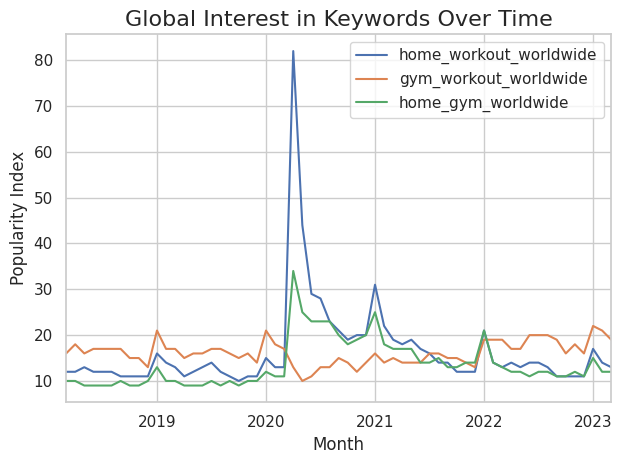

Most Popular During COVID: home_workout_worldwide
Most Popular Currently: gym_workout_worldwide


In [12]:
# Step 2: Identify the most popular keywords during COVID and currently
plt.figure(figsize=(14, 7))
three_keywords_df.plot(x='month', y=['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide'])
plt.title('Global Interest in Keywords Over Time', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Popularity Index')
plt.grid(True)
plt.tight_layout()
plt.show()

covid_df = three_keywords_df[(three_keywords_df['month'] >= '2020-01') & (three_keywords_df['month'] <= '2020-12')]
current_df = three_keywords_df[three_keywords_df['month'] == three_keywords_df['month'].max()]

peak_covid = covid_df[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].mean().idxmax()
current = current_df[['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']].idxmax(axis=1).values[0]
print(f"Most Popular During COVID: {peak_covid}")
print(f"Most Popular Currently: {current}")

#### 11.3 Country with Highest Interest in Workouts

In [13]:
# Step 3: Find the country with the highest interest in workouts
selected_countries = ['United States', 'Australia', 'Japan']
filtered_workout_geo_df = workout_geo_df[workout_geo_df['country'].isin(selected_countries)]
top_country = filtered_workout_geo_df.loc[filtered_workout_geo_df['workout_2018_2023'].idxmax(), 'country']
print(f"Top Country for Workouts: {top_country}")

Top Country for Workouts: United States


#### 11.4 MESA Country with Highest Interest in Home Workouts

In [14]:
# Step 4: Find the MESA country with the highest interest in home workouts
mesa_countries = ['Philippines', 'Malaysia']
filtered_home_workout_geo_df = three_keywords_geo_df[three_keywords_geo_df['Country'].isin(mesa_countries)]
home_workout_geo = filtered_home_workout_geo_df.loc[filtered_home_workout_geo_df['home_workout_2018_2023'].idxmax(), 'Country']
print(f"Highest Interest in Home Workouts (Philippines vs Malaysia): {home_workout_geo}")


Highest Interest in Home Workouts (Philippines vs Malaysia): Philippines


### Conclusion
In this project, we conducted a thorough analysis of workout trends using various data sources, including global workout interest, keyword popularity, and geographical data. Here are the key takeaways:

#### Trend Insights:

- Global Workout Interest: The distribution of global workout data revealed patterns in workout popularity, providing a clear view of how global interest varies.
Keyword Trends: Analysis of the three selected keywords (home workout, gym workout, and home gym) showed how interest in these specific workout types has evolved over time, highlighting shifts in preferences.
Geographical Analysis:

- Workout Interest by Country: Visualizations of workout interest by country identified regions with high and low engagement, shedding light on geographical differences in workout trends.
Home Workout Interest: A focused analysis on home workout interest by country indicated varying levels of engagement, which can help in targeting regional marketing strategies.
Visualization Effectiveness:

- Clear Presentation: The use of histograms, line plots, and bar charts provided a clear and effective way to visualize trends and distributions, making complex data more understandable.
- Optimized Layout: Arranging the visualizations in a single column with appropriate font sizes and label rotations ensured readability and easy comparison across different plots.

#### Future Optimisations:
- Further Analysis: For deeper insights, consider integrating additional data sources or performing more granular analyses, such as regional sub-trends or seasonal variations.
- Enhanced Visualizations: Explore interactive visualization tools to allow for more dynamic exploration of the data and trends.

Overall, this project successfully highlighted key workout trends and geographical interests, providing valuable insights that can inform marketing strategies, content creation, and further research in workout trends.